In [2]:
import matplotlib.pyplot as plt
%pylab inline

import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Random Numbers

Documentation: https://docs.scipy.org/doc/numpy/reference/routines.random.html


Numpy gives us the ability to select random numbers from a variety of different distribution functions (see the np.random documentation for a full list). However, the two most frequently used distributions are 

- the uniform distribution: np.random.rand
- the normal (Gaussian) distribution: np.random.randn
(*notice the "n" that distinguishes the functions for generating normal vs. uniform distributions*)

# Let's start with the uniform distribution (rand), which gives numbers uniformly distributed over the interval [0,1).

First, let's generate a vector of length 5 populated with 5 uniformly distributed random numbers. The funciton np.random.rand takes the size of the desired output array as an argument (in this case, 5).

In [3]:
np.random.rand(5)

array([ 0.73424106,  0.41597041,  0.78075643,  0.98710466,  0.70473977])

We can also generate arrays by specifying the size in each dimension.

In [4]:
np.random.rand(5,5)

array([[ 0.01827283,  0.31884662,  0.53554449,  0.5669449 ,  0.41660916],
       [ 0.46397829,  0.09103389,  0.30033549,  0.55726084,  0.45257455],
       [ 0.39352307,  0.97103251,  0.19748922,  0.07578728,  0.09266102],
       [ 0.10681799,  0.03774168,  0.85725677,  0.82514582,  0.35906106],
       [ 0.43850977,  0.5233673 ,  0.83215099,  0.52840517,  0.90747325]])

So, it turns out that np.random does not give us truly random numbers, but what are called "pseudo-random" numbers. The random numbers that we get are based on a 'seed' number. By default, this seed is chosen based off of a different random generator. However, we have the option to specify the seed.

In practice, you will normally not specify the seed so that you get a new set of random numbers. However, it can be useful for debugging or analysis purposes to pick a seed so that you get the exact same set each time the program is run. Try re-running the cell above a few times and notice how the numbers are different each time. Next, run the cell below multiple times, and notice how the result is always the same

In [5]:
np.random.seed(1337)
np.random.rand(5,5)

array([[ 0.26202468,  0.15868397,  0.27812652,  0.45931689,  0.32100054],
       [ 0.51839282,  0.26194293,  0.97608528,  0.73281455,  0.11527423],
       [ 0.38627507,  0.62850118,  0.12505793,  0.98354861,  0.44322487],
       [ 0.78955834,  0.79411858,  0.36126157,  0.41610394,  0.58425813],
       [ 0.76017177,  0.18780841,  0.28816715,  0.67021886,  0.49964826]])

# The normal distribution (randn) selects random numbers from a Gaussian curve, sometimes called a bell curve.

The equation for a Gaussian curve is the following:

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

where $\mu$ is the mean and $\sigma$ is the standard deviation. 

(FYI: don't panic if this part is confusing right now, we're going to explore the Gaussian distribution more in just a bit)

np.random.randn selects numbers from this standard normal distribution, which is the Gaussian curve where for $\mu=0$ and $\sigma=1$. It takes the size of the output as an argument just like rand does.

Try running the cell below to see the numbers you get from a normal distribution.

In [6]:
np.random.randn(5)

array([-0.33267992, -1.23112306,  0.14860042, -1.41011215, -0.40859609])

# Histograms

Documentation: http://matplotlib.org/1.2.1/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist

Understanding distributions is perhaps best done by plotting them in a histogram. Fortunately, matplotlib makes that very simple for us.

plt.hist takes, at minimum, a vector of values that we want to generate a histogram of. We can also specify the number of bins.

# First, let's plot a uniform distribution and take a look.

Run the cell below to see.

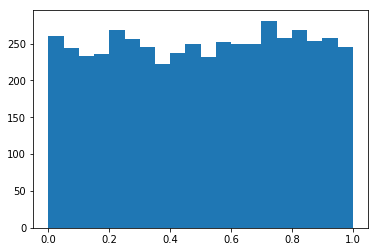

In [7]:
X = np.random.rand(5000)
N,bins,patches = plt.hist(X, bins=20)

You can go ahead and vary the length of the random array or the number of bins and see how random noise effects the output.

Now, let's take a look at the gaussian distribution using a histogram. Generate a vector of length 5000 from the normal distribution and plot a histogram with 50 bins

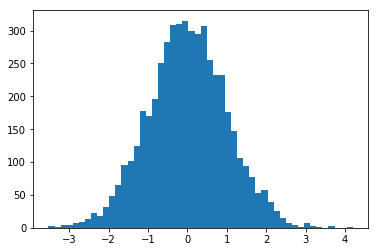

In [8]:
#Put your code here
X = np.random.randn(5000)
N,bins,patches = plt.hist(X,bins=50)

A gaussian with mean zero and standard deviation one is not particularly interesting. However we can transform the distribution given by np.random.randn() using simple arithmetic. Run the cell below to see.

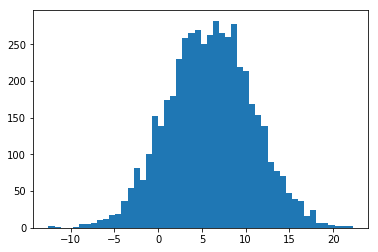

In [9]:
mu = 6 #the mean of the distribution
sigma = 5 #the standard deviation

X = sigma * np.random.randn(5000) + mu
N,bins,patches = plt.hist(X,bins=50)

# Compare the histograms of the uniform and normal distributions. Do they look different? If so, how?

In [ ]:
#write down your observations here


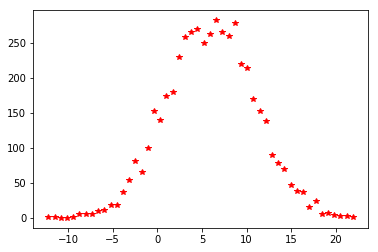

In [10]:
# You can also make use of the bins and N created in the hist function
# The bins array is longer by one element because the bins array contains all the edges of the bins 
# You can average the consecutive bin elements to get a bin-average and then plot it with 
# the number of observations in that bin (i.e. N)

bin_avg = (bins[1:]+bins[:-1])/2
plt.plot(bin_avg, N, 'r*')
plt.show()

Vary the values of mu and sigma in the above code to see how the mean affects the center of the distribution and the standard deviation affects the width.

Numpy also gives us the ability to calculate the mean and standard deviation of a distribution. Run the cell below to see.

In [11]:
mean = np.mean(X)
std = np.std(X)
print('mean: '+ repr(mean) )
print('standard deviation: ' + repr(std))

mean: 5.9492125898814354
standard deviation: 4.8583857454470794


Ok, so generating random numbers and then getting statistics about them is not particularly helpful, so let's try working with some real data. First, we'll import a list of fluorescence lifetimes in nanoseconds from Nitrogen-Vacancy defects in diamond.

(While it is not at all necessary to understand the physics behind this, this is real data! You can read more about it at http://www.nature.com/articles/ncomms11820 if you are so inclined. This data is from Fig. 6a).

In [13]:
lifetimes = np.loadtxt('Data/LifetimeData.txt')

Next, plot a histogram of this data set (play around with the number of bins, too).

In [ ]:
#Put your code here
N,bins,patches = plt.hist(lifetimes,bins=10)

Now, calculate and print the mean and standard deviation of this distribution.

In [14]:
#Put your code here
mean = np.mean(lifetimes)
std = np.std(lifetimes)
print("mean: "+repr(mean))
print("standard deviation: "+repr(std))

mean: 12.026044036697249
standard deviation: 2.5675576211167996


## Bonus Material?
Let's try and overlay a Gaussian curve on top of the histogram we just plotted. To do that, we are first going to need to define a function for the Gaussian. Name your function `gaussian` and have it take the arguments `X, sigma, mu`

remember, a Gaussian is defined by $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

In [15]:
#put your code here
def gaussian(X,sigma,mu):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(X-mu)**2/(2*sigma**2))

Now lets check to see if your function is correct by plotting it.

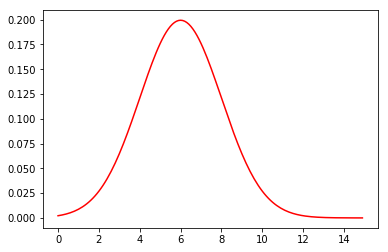

In [16]:
X = np.arange(0,15,0.1)
sigma = 2
mu = 6
plt.plot(X,gaussian(X,sigma,mu),'r-')

If your gaussian is correct, your plot should look like this: 

![gaussian](Data/gaussian.png)

Now, re-plot the histogram of lifetimes from above, but also overlay a plot of the gaussian curve with the same mean and standard deviation from the lifetime distribution. It's important to notice that the gaussian curve is normalized to have a sum under the curve equal to one, but the histogram does not! Fortunately, we can fix this by adding `normed=True` to the list of arguments passed to `plt.hist`

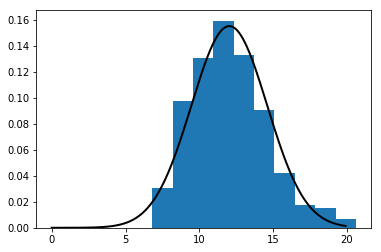

In [17]:
#Put your Code Here

X = np.arange(0,20,0.1)
mu = np.mean(lifetimes)
sigma = np.std(lifetimes)
plt.hist(lifetimes,bins=10,normed=True)
plt.plot(X,gaussian(X,sigma,mu),'k-',linewidth=2)

# Linear Regression

Documentation: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html

When analyzing experimental data, we frequently would like to be able to fit theoretical models to match our results. You might have already used linear regression in a previous science course (In Excel, this is done with the LINEST function) The simplest case of that is fitting a straight line to a collection of data. This is done through a method known as linear regression. Since we don't have time to teach an entire statistics course, we will say that linear regression minimizes the total distance between each data point and best-fit line. 

First, lets load a set of data and plot it to see how it looks

In [ ]:
data = np.loadtxt('Data/scatter1.txt')
plt.plot(data[:,0],data[:,1],'ko')

Looking at the data gives us a pretty good idea that there is a linear relationship between the two variables. Now, we're gonna use `linregress` from the `scipy.stats` module to do a linear fit

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data[:,0],data[:,1])
print("slope: "+repr(slope))
print("intercept: "+repr(intercept))
print("R squared: "+repr(r_value**2))

`stats.linregress` gives us quite a few pieces of output! First, it gives us the slope, $m$, and the intercept, $b$, for the best fit line (remember $y = mx +b$) It also gives us the $R^2$ value, which gives a general sense of the strength of the linear relationship between the x and y variables. $R^2$ varies between the values 0 and 1, with 1 indicating complete linearity and 0 indicating no linearity. Often, we will us $R^2$ to determine if a fit is "good", but we should always be careful when using statistics...

Now, lets go ahead and replot the scatter1.txt data from above, but then overlay the line of best fit using the slope and intercept from above

In [ ]:
#Your Code Here
plt.plot(data[:,0],data[:,1],'ko')
X = np.arange(0,101,1)
plt.plot(X,slope*X+intercept,'r-')

When you're done, you should have a plot like this:
![scatter plot](Data/scatter1-fit.png)

# Non-linear Fitting: Experiment to Models
Now we will try a Non-linear fit to some real data! Typically, most things measuered in labs or with telescopes will be non-linear in nature, and will require built-in computer algorithms if we hope to fit our models to data. 

In this example, we will learn how to model an emission line, in general. Just a quick aside, when you look at a neon sign, you are essentially collecting photons emitted in a narrow range of wavelenghts. Such emisison occurs when atoms or molecules go from a higher energy state to a lower energy state. That's enough background!

Here, we will simulate an emission line on top of the continuum spectrum. There could be many kinds of continuum spectra such as blackbody or power-law, but here, we will assume a simple case of linear continuum. An emission line can be reasonably described as a Gaussian. In reality, it's a Voigt profile (https://en.wikipedia.org/wiki/Voigt_profile), but for simplicity we will assume a Gaussian profile.

# Problem Definition

In this problem, we will create a mock emission line observation. We will add a noise term to simulate the detector noise (mainly comprising of thermal noise and readout noise) and then try to fit a model to see and see how well we can do it. You can also play around with the signal to noise ratio and see how the fit changes with increasing noise. This excercise will also help you to determine how good a signal-to-noise ratio you would need for measuring an emission line faithfully.  

As you know, a Guassian (or Normal) function is described as follows:

$G(x;A,\sigma,x_0)=Ae^{-\frac{(x-x_0)^2}{2\sigma^2}}$

Where x is the coordinate (in this case, wavelength)

A is the height of the curve, or unnormalized amplitude

$x_0$ is the center of the peak or emission line

$\sigma$ is the "standard diviation" of the peak (for now, take it as a measure of width)

We will define a linear continuum as:
$continuum = ax + b$

So our emission line is : Flux (wavlength) = $ G(x;A,\sigma,x_0) + continuum $
After adding noise term, it becomes -> Flux_observed (wavlength) = $ G(x;A,\sigma,x_0) + continuum + noise $

Generate the noise using a normalized random number generator: 
noise = noise_level* np.random.normal(size=len(wavelength))

Start with a noise level of 3

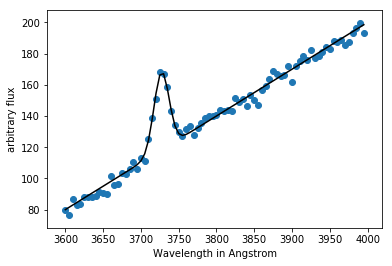

In [10]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Let's create a function to model and create data
def Emission_line(x, a, b, amp, x0, sigma):
    continuum = a*x + b*np.ones_like(x) 
    Gaussian = amp*np.exp(-(x-x0)**2/(2*sigma**2))
    return continuum + Gaussian

# Generating a mock observation
# Wavelength units in Angstrom
wavelength_step = 5 
wavelength  = np.arange(3600, 4000, wavelength_step)
line_center = 3727.2    # O II emission line
line_amp    = 50.0      # Arbitrary amplitude
line_width  = 10.0      # 10 Angstroms in wavelength

# Arbitrary selection for continuum
cont_slope     = 0.3           # continuum slope
cont_intercept = -1000.0       # continuum intercept  

# Adding the noise term
noise_level = 3 
noise = noise_level* np.random.normal(size=len(wavelength))

line_clean = Emission_line(wavelength, cont_slope, cont_intercept, line_amp, line_center, line_width)
line_obs = noise + line_clean

# Plot out the current state of the data and model
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(wavelength, line_clean, c='k', label='Emission line')
ax.scatter(wavelength, line_obs)
ax.set_xlabel('Wavelength in Angstrom')
ax.set_ylabel('arbitrary flux')
plt.show()

Now we will do curve fitting using scipy curve_fit

In [20]:
# Executing curve_fit on noisy data

# Initial guess: It's good to start with initial guess to save time and computational power
guess = [0.1, -100.0, 40, 3725, 25]

# Parameter bounds
bounds_low = [0, -10000, 10, 3700, 1]
bounds_high = [1,0, 200, 3800, 100]

popt, pcov = curve_fit(Emission_line, wavelength, line_obs, p0 = guess, bounds = (bounds_low, bounds_high) )
perr = np.sqrt(np.diag(pcov))
# Quick tip: You can also incorporate measurement errors in the curve_fit by adding another argument for error. 
# For details check here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

# popt returns the best fit values for parameters of the given model (func)
# perr returns the error on the model fit
for name, popt_, perr_ in zip(['cont_slope', 'cont_intercept', 'line_amp', 'line_center', 'line_width'], popt, perr):
    print(u'{:2s} = {} ± {}'.format(name, popt_, perr_))

cont_slope = 0.30202978615959925 ± 0.00313186190489875
cont_intercept = -1008.2188020977587 ± 11.93285666654716
line_amp = 50.79108713902204 ± 2.0670456396739905
line_center = 3727.4247488511437 ± 0.4646529036134749
line_width = 10.00215112998087 ± 0.481236024210297


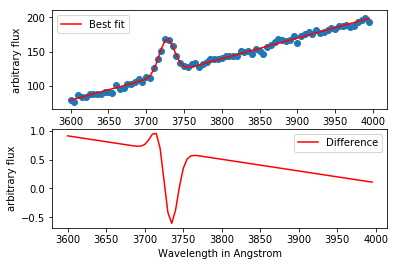

In [24]:
# Plotting the results:

line_fit = Emission_line(wavelength, *popt)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(wavelength, line_fit, c='r', label='Best fit')
ax.scatter(wavelength, line_obs)
ax.set_xlabel('Wavelength in Angstrom')
ax.set_ylabel('arbitrary flux')
ax.legend()

# Plotting the difference between he actual clean data and the model fit.
# Notice that this difference changes everytime you generate a new dataset (run the first part and the second part)
# Exercise: Can you explain why this difference changes every time? 
ax = fig.add_subplot(212)
ax.plot(wavelength, line_clean-line_fit, c='r', label='Difference')
ax.set_xlabel('Wavelength in Angstrom')
ax.set_ylabel('arbitrary flux')

ax.legend()
plt.show()

Exercise: Now try playing with the following things:
1. Increase the noise_level -> What effect do you see on you model fit? When does it start becoming unacceptable?
2. Increase the noise and try without providing an initial guess. See what happens. Is the fit better or worse?
3. Increase the noise and try without providing the bounds. See what happens. Is the fit better or worse?
4. Play around with the parameters of the emission line function. What happens if you make the amplitude negative?    Make sure you edit your guesses and bounds accordingly when you do that.

You can see the importance of initial guesses and bounds in a noisy data. 